# K-nearest neighbor

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ['sepal-length','sepal-width','petal-length','petal-width','Class']
dataset = pd.read_csv('D:/github/DeepLearningWithPytorch_data/main/chap03/data/iris.data',names=names)
##데이터를 판다스 데이터 프레임으로 저장

In [5]:
X = dataset.iloc[:,:-1].values #뒤에서 하나 뺀 값을 가져와 저장
y = dataset.iloc[:,4].values #  열은 앞에서 다섯번째 값만 가져와서 저장

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.preprocessing import StandardScaler
s = StandardScaler() # 특성 스케일링 , 평균이 - 표준편차가 1이 되도록 편환
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [8]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print('ACC {}'.format(accuracy_score(y_test,y_pred)))

ACC 0.8


# 최적의 K 찾기

In [10]:
k = 10
acc_array  = np.zeros(k)
for k in np.arange(1,k+1,1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_array[k-1]= acc

max_acc = np.max(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("acc ",max_acc,'최적의 k는 ',k+1)

acc  0.9333333333333333 최적의 k는  4


# 서포트 벡터 머신

In [12]:
from sklearn import svm,metrics,datasets,model_selection
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #0은 모든 로그 표시 1은 인포 로그 필터링 2는 워닝로그 필터링 3은 에러 로그 필터링

In [13]:
iris = datasets.load_iris()
X_train,X_test,y_train,y_test = model_selection.train_test_split(iris.data,iris.target,test_size=0.6,random_state=42)

In [14]:
svm = svm.SVC(kernel='linear',C=1.0,gamma=0.5)
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test,predictions)
print('ACC {0:f}'.format(score))

ACC 0.988889


# 결정 트리

In [15]:
import pandas as pd
df = pd.read_csv('D:/github/DeepLearningWithPytorch_data/main/chap03/data/titanic/train.csv',index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [16]:
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df = df.dropna()
X = df.drop('Survived',axis=1)
y = df['Survived']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8268156424581006

In [21]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_predict),columns=['Predicted Not Survival','Predicted Survival'],
             index=['True Not Survival','True Survival'])

,Predicted Not Survival,Predicted Survival
True Not Survival,99,13
True Survival,18,49


# 로지스틱 회귀 분석

In [22]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image data shape",digits.data.shape)
print("Label data shape",digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


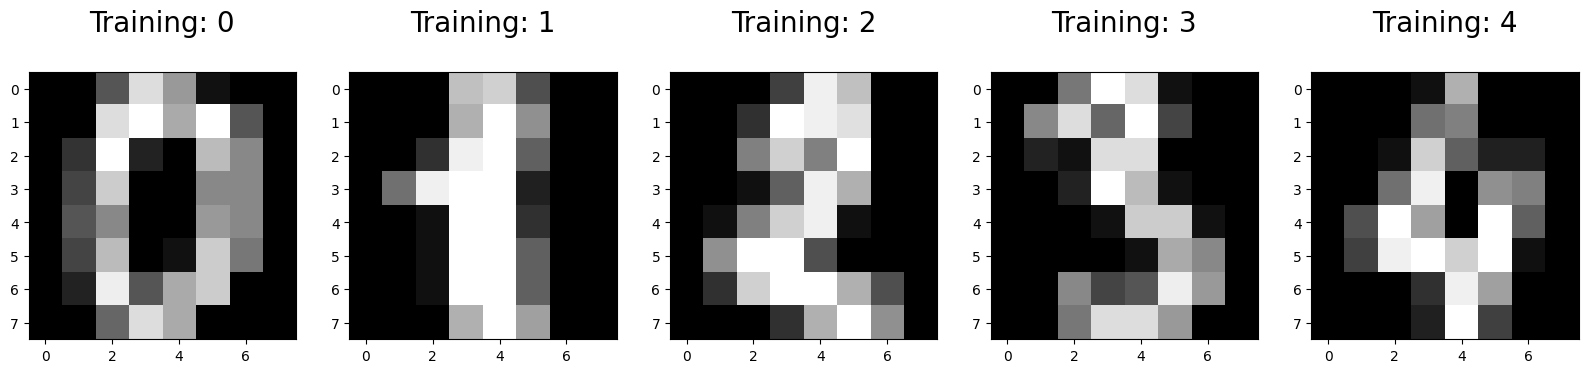

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' %label, fontsize=20)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [26]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test,y_test)
print(score)

0.9511111111111111


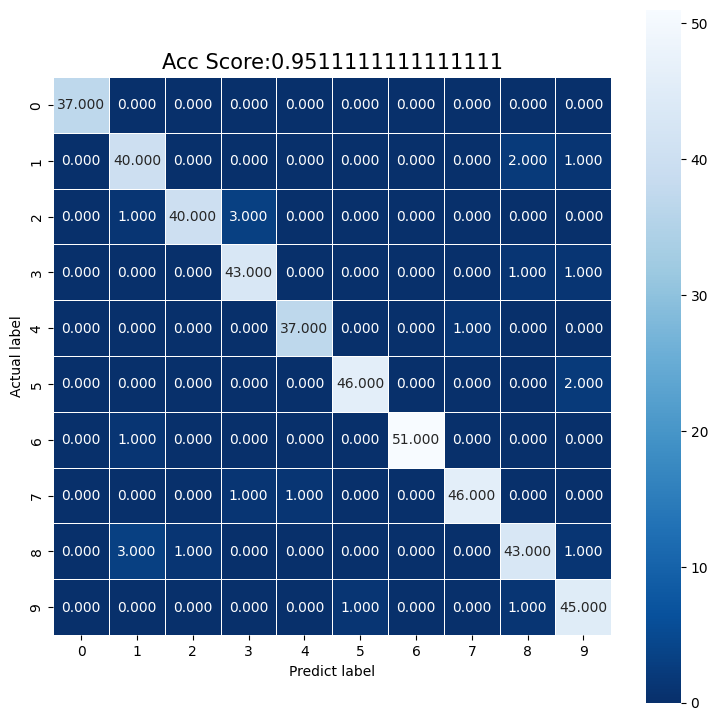

In [29]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predict label')
all_sample_title = "Acc Score:{0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

# 선형회귀

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [31]:
dataset = pd.read_csv('D:/github/DeepLearningWithPytorch_data/main/chap03/data/weather.csv')

        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  11/1/2007  Canberra      8.0     24.3       0.0          3.4       6.3   
1  11/2/2007  Canberra     14.0     26.9       3.6          4.4       9.7   
2  11/3/2007  Canberra     13.7     23.4       3.6          5.8       3.3   
3  11/4/2007  Canberra     13.3     15.5      39.8          7.2       9.1   
4  11/5/2007  Canberra      7.6     16.1       2.8          5.6      10.6   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0          NW           30.0         SW  ...          29       1019.7   
1         ENE           39.0          E  ...          36       1012.4   
2          NW           85.0          N  ...          69       1009.5   
3          NW           54.0        WNW  ...          56       1005.5   
4         SSE           50.0        SSE  ...          49       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1015.0        

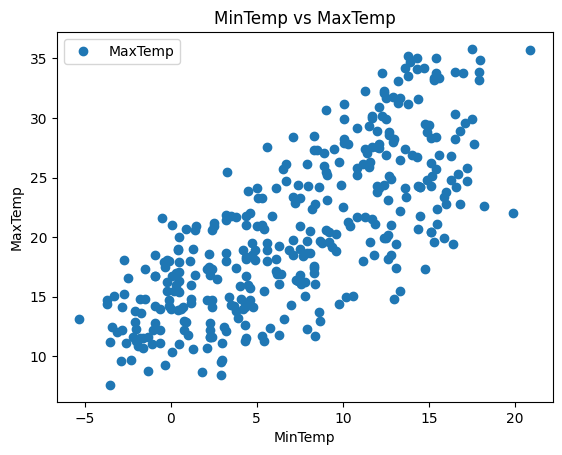

In [33]:
print(dataset.head())
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [34]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)
df= pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,11.8,19.621745
1,29.2,23.466997
2,33.9,29.533948
3,33.9,28.337648
4,28.5,21.330746
...,...,...
69,29.3,24.065147
70,17.3,16.289195
71,27.6,19.023595
72,16.6,12.102143


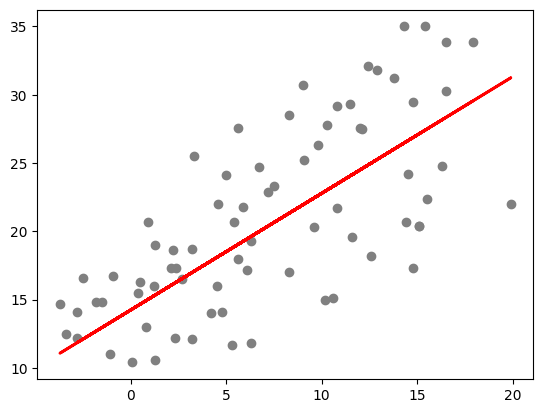

In [38]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [39]:
print("평균제곱법:",metrics.mean_squared_error(y_test,y_pred))
print("루트 평균제곱법:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

평균제곱법: 23.422681232145642
루트 평균제곱법: 4.839698465002303


# Decision Tree

In [40]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [46]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [42]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node with value=[[37. 34. 41.]]: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node with value=[[37.  0.  0.]].
	node=2 is a split node with value=[[ 0. 34. 41.]]: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node with value=[[ 0. 33.  3.]].
		node=4 is a leaf node with value=[[ 0.  1. 38.]].


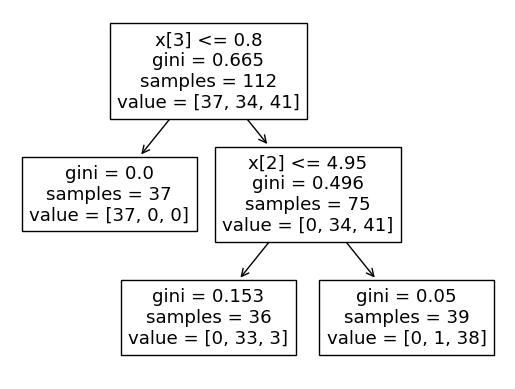

In [43]:
tree.plot_tree(clf)
plt.show()